# Loan Approval Prediction
- To train a model to check if a user is eligible to get loan

In [2]:
#Importing libraries and loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#loading dataset
df = pd.read_csv('train.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

# A short information checking of the dataset

In [4]:
print(df.shape)
print("\n")
print(df.info)
print("\n")
print(df.describe())

(614, 13)


<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               58

## Data Cleaning
- Missing value handling and column drops

In [6]:
# Fill categorical columns with mode (most frequent value)
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with mean
num_cols = ['LoanAmount']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [7]:
# Dropping Irrelevant Columns
df.drop(['Loan_ID'], axis=1, inplace=True)

In [8]:
#checking missing values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis (EDA)
- Plots showing relationships between features and Loan_Status.

Text(0.5, 1.0, 'Loan Status Distribution')

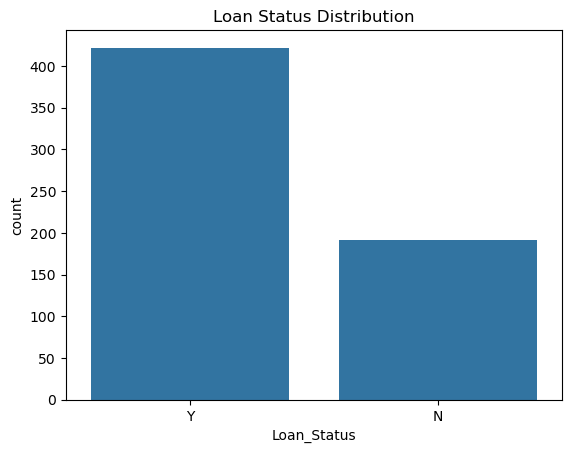

In [10]:
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")

<Axes: xlabel='Gender', ylabel='count'>

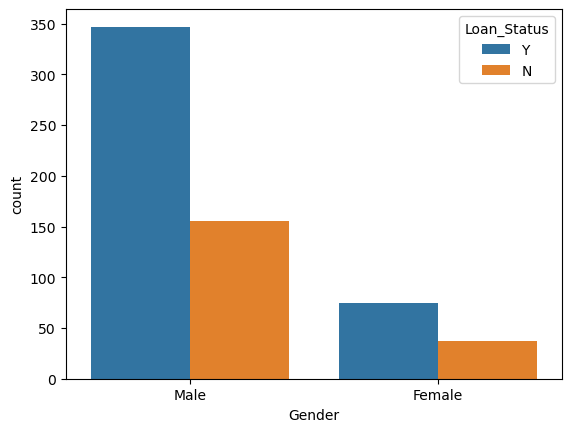

In [11]:
#Gender vs Loan Status
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

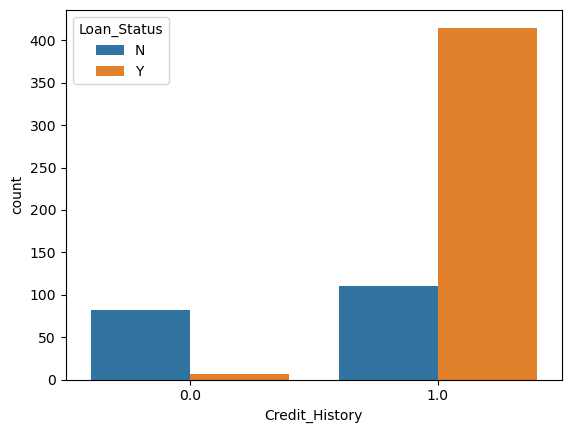

In [12]:
#Credit History vs Loan Status
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

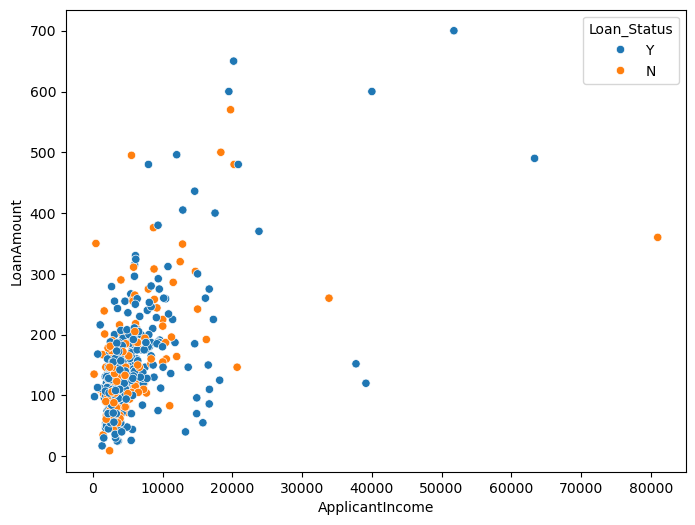

In [13]:
#Income vs Loan Amount
plt.figure(figsize=(8,6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)

## Feature Engineering
- Encoding categorical variables and transforming data.

In [15]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Load_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [16]:
#Handling Dependants
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [17]:
#One-Hot Encoding for Categorical Columns
df = pd.get_dummies(df, drop_first=True)

## Model Building
- Logistic Regression used to predict loan approval status.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Splitting Features and Target
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluation
- Accuracy score and confusion matrix.

In [22]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", acc)
print("Confusion Matrix:\n", cm)

Accuracy Score: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
